There are two spectras that are relevant from this experiment.

The first one is of the thick Havar stopper foil of thickness 3.2 $\mu$m.

The energy calibration is calculated from EnergyCalibrationv04.ods. The equation of the energy calibration is $f(x)=0.00536x+1.44$

[133.89943809   3.1289099    0.22407763]


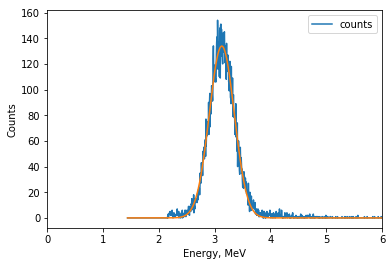

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

fp = 'Au_10B_foil.mpa'
spectrum = pd.read_csv(fp, sep=',', skiprows=221)
# spectrum['channel'] = 0.0
# spectrum.plot()
# ax = plt.gca()
# ax.set_xlabel("Channel number")
# ax.set_ylabel("Counts")
# ax.set(xlim=(0, 600))
# ax.legend().remove()



# spectrum.columns()

# Create the dictionary with old and new names
new_names = {'0': 'counts'}
# Rename the columns
spectrum = spectrum.rename(columns=new_names)

# spectrum.head()
spectrum.shape


def energy(channelno):
    return 0.00536*channelno+1.44

# data["energy"] = energy(spectrum["TEMP_F"])

spectrum["energy"]=energy(spectrum.index)

spectrum.head()

# spectrum.plot("energy","counts")
# ax = plt.gca()
# ax.set_xlabel("Energy, MeV")
# ax.set_ylabel("Counts")
# ax.set(xlim=(0, 6))
# ax.legend().remove()

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, spectrum["energy"], spectrum["counts"], p0 = [1, 5, 0.4])


spectrum.plot("energy","counts")
ax = plt.gca()
ax.set_xlabel("Energy, MeV")
ax.set_ylabel("Counts")
ax.set(xlim=(0, 6))
# ax.legend().remove()
plt.plot(spectrum["energy"], gauss_function(spectrum["energy"], *popt), label='fit')

print(popt)



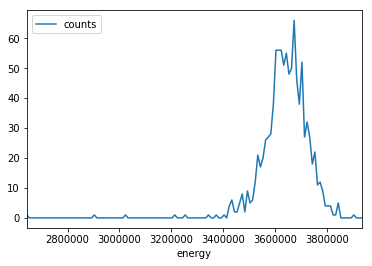

In [39]:
fp = 'Hist10BHavar3.2um.txt'
SrimHist10BHavar3p2um = pd.read_csv(fp, delim_whitespace=True, header=None)

SrimHist10BHavar3p2um.columns = ['energy','counts']


# # Create the dictionary with old and new names
# new_names = {'2.64304e+06': 'energy,eV', '1':'counts,a.u.'}
# # Rename the columns
# SrimHist10BHavar3p2um = SrimHist10BHavar3p2um.rename(columns=new_names)

SrimHist10BHavar3p2um.head()

SrimHist10BHavar3p2um.plot("energy","counts")
